# Machine Learning (and Numpy Arrays)

Machine Learning is about building programs with **tunable parameters** (typically an
array of floating point values) that are adjusted automatically so as to improve
their behavior by **adapting to previously seen data.**

Machine Learning can be considered a subfield of **Artificial Intelligence** since those
algorithms can be seen as building blocks to make computers learn to behave more
intelligently by somehow **generalizing** rather that just storing and retrieving data items
like a database system would do.

We'll take a look at a very simple machine learning tasks here: the **clustering** task

## *Data* for Machine Learning Algorithms

Data in machine learning algorithms, with very few exceptions, is assumed to be stored as a
**two-dimensional array**, of size `[n_samples, n_features]`.

The arrays can be
either ``numpy`` arrays, or in some cases ``scipy.sparse`` matrices.
The size of the array is expected to be `[n_samples, n_features]`

- **n_samples:**   The number of samples: each sample is an item to process (e.g. classify).
  A sample can be a document, a picture, a sound, a video, an astronomical object,
  a row in database or CSV file,
  or whatever you can describe with a fixed set of quantitative traits.

- **n_features:**  The number of features or distinct traits that can be used to describe each
  item in a quantitative manner.  Features are generally real-valued, but may be boolean or
  discrete-valued in some cases.

The number of features must be fixed in advance. However it can be very high dimensional
(e.g. millions of features) with most of them being zeros for a given sample. 

This is a case where `scipy.sparse` matrices can be useful, in that they are much more memory-efficient than numpy arrays.

### Addendum

There is a dedicated notebook in the training material, explicitly dedicated to `scipy.sparse`: [07_1_Sparse_Matrices](./07_1_Sparse_Matrices.ipynb)

## A Simple Example: the Iris Dataset

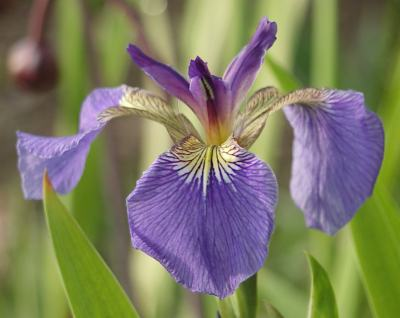

Iris Setosa



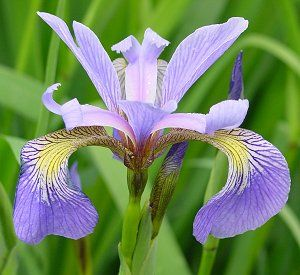

Iris Versicolor



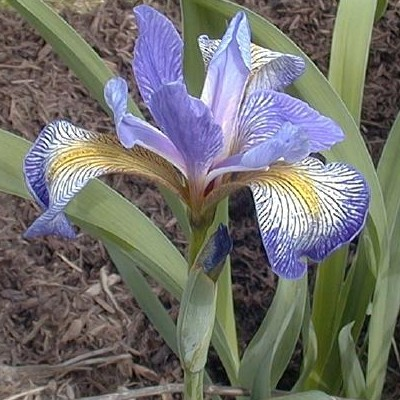

Iris Virginica


In [2]:
from IPython.core.display import Image, display
display(Image(filename='images/iris_setosa.jpg'))
print("Iris Setosa\n")

display(Image(filename='images/iris_versicolor.jpg'))
print("Iris Versicolor\n")

display(Image(filename='images/iris_virginica.jpg'))
print("Iris Virginica")

- Features in the Iris dataset:

  1. sepal length in cm
  2. sepal width in cm
  3. petal length in cm
  4. petal width in cm

- Target classes to predict:

  1. Iris Setosa
  2. Iris Versicolour
  3. Iris Virginica

In [47]:
from sklearn.datasets import load_iris
iris = load_iris()

Try by yourself one of the following commands where *'d'* is the variable containing the dataset:

    print(iris.keys())           # Structure of the contained data
    print(iris.DESCR)            # A complete description of the dataset
    print(iris.data.shape)       # [n_samples, n_features]
    print(iris.target.shape)     # [n_samples,]
    print(iris.feature_names)
    datasets.get_data_home() # This is where the datasets are stored

In [48]:
print(iris.keys())

dict_keys(['target_names', 'target', 'feature_names', 'DESCR', 'data'])


In [49]:
print(iris.DESCR)

Iris Plants Database

Notes
-----
Data Set Characteristics:
    :Number of Instances: 150 (50 in each of three classes)
    :Number of Attributes: 4 numeric, predictive attributes and the class
    :Attribute Information:
        - sepal length in cm
        - sepal width in cm
        - petal length in cm
        - petal width in cm
        - class:
                - Iris-Setosa
                - Iris-Versicolour
                - Iris-Virginica
    :Summary Statistics:
    ============== ==== ==== ======= ===== ====================
                    Min  Max   Mean    SD   Class Correlation
    ============== ==== ==== ======= ===== ====================
    sepal length:   4.3  7.9   5.84   0.83    0.7826
    sepal width:    2.0  4.4   3.05   0.43   -0.4194
    petal length:   1.0  6.9   3.76   1.76    0.9490  (high!)
    petal width:    0.1  2.5   1.20  0.76     0.9565  (high!)
    ============== ==== ==== ======= ===== ====================
    :Missing Attribute Values: None
    

In [50]:
print(type(iris.data))

<class 'numpy.ndarray'>


In [51]:
data = iris.data
print(data.size, data.shape)

600 (150, 4)


## Spatial and Clustering Analysis

**Spatial** and **Clustering** analysis are key to identifying patterns, groups, and clusters in data. 
In astrophysics, for example, these analysis techniques are used to seek and identify star clusters, galaxy clusters, and large-scale filaments (composed of galaxy clusters). 

<img src="images/cluster_0.png">

<img src="images/cluster_1.png">

<img src="images/modeling_data_flow.png">

## Machine Learning with SciPy

**SciPy** provides a spatial analysis class (`scipy.spatial`) and a cluster analysis class (`scipy.cluster`). 

* The spatial class includes functions to analyze distances between data points (e.g., k-d trees). 

* The cluster class provides two overarching subclasses: 

    - vector quantization (`vq`); 
    - hierarchical clustering (`hierarchy`). 
    
**Vector quantization** groups large sets of data points (`vectors`) where each group is represented by centroids. 

The **hierarchy** subclass contains functions to construct clusters and analyze their substructures.

(*We won't see examples of hierarchical clustering in this notebook*)

### Simple Example

In [11]:
import numpy as np
from scipy.cluster import vq

In [12]:
# Creating randomly generated data
c1 = np.random.randn(100, 2) + 5 
c2 = np.random.randn(30, 2) - 5 
c3 = np.random.randn(50, 2)

In [13]:
# Pooling all the data into one 180 x 2 array 
data = np.vstack([c1, c2, c3])

In [14]:
# Calculating the cluster centroids and variance # from kmeans
centroids, variance = vq.kmeans(data, 3)

In [15]:
# The identified variable contains the information 
# we need to separate the points in clusters
# based on the vq function.
identified, distance = vq.vq(data, centroids)

In [16]:
# Retrieving coordinates for points in each vq # identified core
vqc1 = data[identified == 0]
vqc2 = data[identified == 1]
vqc3 = data[identified == 2]

In [100]:
%matplotlib inline

In [102]:
%load utility/plot_clustering.py

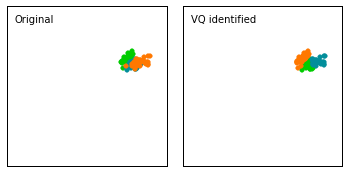

In [105]:
plot_kmeans_clustering_results(c1, c2, c3, vqc1, vqc2, vqc3)
plt.show()

### Iris Example

In [52]:
iris.feature_names

['sepal length (cm)',
 'sepal width (cm)',
 'petal length (cm)',
 'petal width (cm)']

In [53]:
iris.target

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

In [91]:
sepals = iris.data[:, 0:2]
print(sepals.shape)

(150, 2)


In [92]:
mask = d.target == 0
sepals = data[:,0:2]

In [93]:
# Creating Data
c1 = sepals[d.target == 0]
c2 = sepals[d.target == 1]
c3 = sepals[d.target == 2]

In [94]:
print(c1.shape, c2.shape, c3.shape)

(50, 2) (50, 2) (50, 2)


In [95]:
data = np.vstack([c1, c2, c3])

In [96]:
# Calculating the cluster centroids and variance # from kmeans
centroids, variance = vq.kmeans(data, 3)

In [97]:
identified, distance = vq.vq(data, centroids)

In [98]:
vqc1 = data[identified == 0]
vqc2 = data[identified == 1]
vqc3 = data[identified == 2]

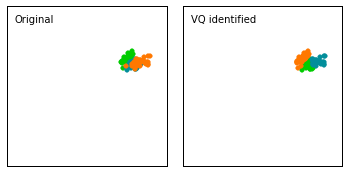

In [106]:
plot_kmeans_clustering_results(c1, c2, c3, vqc1, vqc2, vqc3)
plt.show()

## Note about `kmeans` in `scipy.cluster`

In `scipy.cluster` we have **two** routines to divide data into clusters using the **k-means technique**:

* `kmeans`;
* `kmeans2`. 

They correspond to two different implementations. 

The former has a very simple syntax:
   
       kmeans(obs, k_or_guess, iter=20, thresh=1e-05)
       
The obs parameter is an `ndarray` with the data we wish to cluster. 

If the dimensions of the array are m x n, the algorithm interprets this data as m points in the n-dimensional Euclidean space. 

If we know the number of clusters in which this data should be divided, we enter so with `the k_or_guess` option. 

**Note**: The data we pass to kmeans need to be *normalized* with the `whiten` routine. 

The second function is much more flexible, as its syntax indicates:
   
       kmeans2(data, k, iter=10, thresh=1e-05, minit='random', missing='warn')
       
The `data` and `k` parameters are the same as `obs` and `k_or_guess`, respectively. The difference in this routine is the possibility of choosing among different **initialization algorithms**, hence providing us with the possibility to speed up the process and use fewer resources if we know some properties of our data. 

We do so by passing to the `minit` parameter, one of the strings such as:

* `'random'` (initialization centroids are constructed randomly using a Gaussian);
* `'points'` (initialization is done by choosing points belonging to our data)- **Kmedoids**; 
* `'uniform'` (if we prefer uniform distribution to Gaussian).

In case we would like to provide the initialization centroids ourselves with the `k` parameter, we must indicate our choice to the algorithm by passing 'matrix' to the minit option as well.

## Machine Learning with scikit-learn

### What is scikit-learn?

<img src="images/scikit-learn.png" />

In [107]:
from sklearn.datasets import make_blobs
blobs, classes = make_blobs(500, centers=3)

### Plotting the (randomly generated) data

#### Scatter Plot

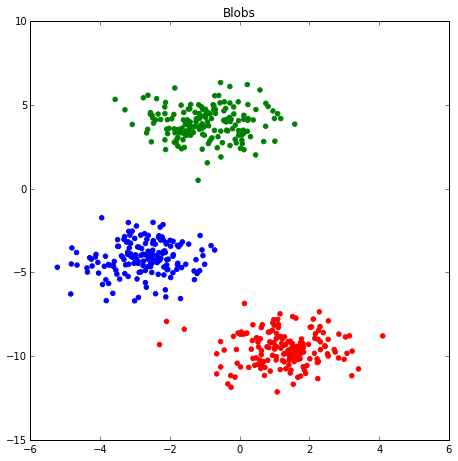

In [110]:
import matplotlib.pyplot as plt

f, ax = plt.subplots(figsize=(7.5, 7.5))
rgb = np.array(['r', 'g', 'b'])

ax.scatter(blobs[:, 0], blobs[:, 1], color=rgb[classes])
ax.set_title("Blobs")

Now we can use **KMeans** to find the centers of these clusters.

(In this example, we'll pretend we know that there are three centers)

In [111]:
from sklearn.cluster import KMeans

kmean = KMeans(n_clusters=3)
kmean.fit(blobs)
kmean.cluster_centers_

array([[-0.95420345,  3.92087883],
       [-2.75450026, -4.13335675],
       [ 1.26593243, -9.56682583]])

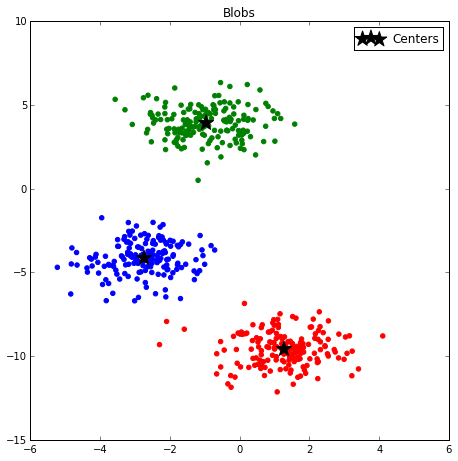

In [113]:
f, ax = plt.subplots(figsize=(7.5, 7.5))
ax.scatter(blobs[:, 0], blobs[:, 1], color=rgb[classes])
ax.scatter(kmean.cluster_centers_[:, 0],
           kmean.cluster_centers_[:, 1], marker='*', s=250,
           color='black', label='Centers')
ax.set_title("Blobs")
ax.legend(loc='best')

plt.show()

In [114]:
# Clustering Results
kmean.labels_[:5]

array([0, 2, 1, 1, 1], dtype=int32)

In [116]:
# Expected Results
classes[:5]

## Please note that KMeans does not know in advance cluster ids, thus it cannot assign the same as in `classes`.
## In any case, please note that same elements correspond to the same numbers (IDs)

array([1, 0, 2, 2, 2])

The `transform` function is quite useful in the sense that it will output the distance between
each point and centroid:

In [118]:
kmean.transform(blobs)[:5]

array([[  0.47214034,   8.23399873,  13.82242774],
       [ 15.79717782,   8.67945871,   2.12920933],
       [  7.82124055,   0.69958497,   6.68488045],
       [  7.86106348,   0.53780226,   6.770957  ],
       [  8.41224735,   1.02961051,   5.95129219]])